<a href="https://colab.research.google.com/github/vbddinho/puc_minas_machine/blob/main/plano3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_estatisticas = pd.read_csv('dados/campeonato-brasileiro-estatisticas-full.csv', sep=',',encoding = "UTF-8")
df_jogos = pd.read_csv('dados/campeonato-brasileiro-full.csv', sep=',',encoding = "UTF-8")



In [3]:
df_jogos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8025 non-null   int64 
 1   rodata              8025 non-null   int64 
 2   data                8025 non-null   object
 3   hora                8025 non-null   object
 4   mandante            8025 non-null   object
 5   visitante           8025 non-null   object
 6   formacao_mandante   3051 non-null   object
 7   formacao_visitante  3051 non-null   object
 8   tecnico_mandante    3415 non-null   object
 9   tecnico_visitante   3415 non-null   object
 10  vencedor            8025 non-null   object
 11  arena               8025 non-null   object
 12  mandante_Placar     8025 non-null   int64 
 13  visitante_Placar    8025 non-null   int64 
 14  mandante_Estado     8025 non-null   object
 15  visitante_Estado    8025 non-null   object
dtypes: int64(4), object(12)


In [4]:
df_estatisticas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16050 entries, 0 to 16049
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       16050 non-null  int64 
 1   rodata           16050 non-null  int64 
 2   clube            16050 non-null  object
 3   chutes           16050 non-null  int64 
 4   chutes_no_alvo   16050 non-null  int64 
 5   posse_de_bola    6838 non-null   object
 6   passes           16050 non-null  int64 
 7   precisao_passes  6838 non-null   object
 8   faltas           16050 non-null  int64 
 9   cartao_amarelo   16050 non-null  int64 
 10  cartao_vermelho  16050 non-null  int64 
 11  impedimentos     16050 non-null  int64 
 12  escanteios       16050 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.6+ MB


In [5]:
#innerjoin = pd.merge(df,df_estatisticas,right_on='partida_id' ,left_on='ID',how='inner')
#innerjoin[(innerjoin['ID'] == 8017)]

In [6]:
dfT = df_jogos[['ID','vencedor','data']]

In [7]:
innerjoin = pd.merge(df_estatisticas,df_jogos,how='inner', left_on='partida_id',right_on='ID' )

In [8]:
innerjoin.isna().sum()

partida_id               0
rodata_x                 0
clube                    0
chutes                   0
chutes_no_alvo           0
posse_de_bola         9212
passes                   0
precisao_passes       9212
faltas                   0
cartao_amarelo           0
cartao_vermelho          0
impedimentos             0
escanteios               0
ID                       0
rodata_y                 0
data                     0
hora                     0
mandante                 0
visitante                0
formacao_mandante     9948
formacao_visitante    9948
tecnico_mandante      9220
tecnico_visitante     9220
vencedor                 0
arena                    0
mandante_Placar          0
visitante_Placar         0
mandante_Estado          0
visitante_Estado         0
dtype: int64

In [9]:
innerjoin.shape

(16050, 29)

In [10]:
#Converte a data do tipo objeto para o tipo datetime e cria a coluna ano
innerjoin["data"] = pd.to_datetime(innerjoin["data"],format='%d/%m/%Y',dayfirst=True)
df_2020_2022 = innerjoin
df_2020_2022["ano"] = df_2020_2022["data"].dt.year

# Analise será feita do ano de 2007 até 2022
df_2020_2022 = df_2020_2022[(df_2020_2022["ano"]>=2020)]
df_2020_2022

#indexa dataFrame
df_2020_2022.set_index('data')
df_2020_2022.shape

(2280, 30)

In [11]:
df_2020_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 13770 to 16049
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   partida_id          2280 non-null   int64         
 1   rodata_x            2280 non-null   int64         
 2   clube               2280 non-null   object        
 3   chutes              2280 non-null   int64         
 4   chutes_no_alvo      2280 non-null   int64         
 5   posse_de_bola       2280 non-null   object        
 6   passes              2280 non-null   int64         
 7   precisao_passes     2280 non-null   object        
 8   faltas              2280 non-null   int64         
 9   cartao_amarelo      2280 non-null   int64         
 10  cartao_vermelho     2280 non-null   int64         
 11  impedimentos        2280 non-null   int64         
 12  escanteios          2280 non-null   int64         
 13  ID                  2280 non-null   int64  

In [12]:
df_2020_2022['temporada'] = df_2020_2022['ano']
df_2020_2022.loc[(df_2020_2022["data"]>="2020/08/08") & (df_2020_2022["data"]<="2021/02/25"),"temporada" ] = 2020
df_2020_2022.loc[(df_2020_2022["data"]>="2021/05/29") & (df_2020_2022["data"]<="2021/12/09"),"temporada" ] = 2021

C:\Users\ADM\AppData\Local\Temp\ipykernel_5044\2870022053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_2022['temporada'] = df_2020_2022['ano']


In [24]:
df_2020_2022.loc[(df_2020_2022.clube == df_2020_2022.mandante),'mandate_'] = 1
df_2020_2022.loc[(df_2020_2022.clube == df_2020_2022.visitante),'visitante_'] = 1

df_2020_2022.loc[(df_2020_2022.clube == df_2020_2022.vencedor),'resultado'] = 1
df_2020_2022.loc[(df_2020_2022.vencedor == '-'),'resultado'] = 3

df_2020_2022['mandate_'].fillna(value=0, inplace=True)
df_2020_2022['visitante_'].fillna(value=0, inplace=True)
df_2020_2022['resultado'].fillna(value=2, inplace=True)


df_2020_2022 = df_2020_2022.drop('mandante',axis=1)
df_2020_2022 = df_2020_2022.drop('visitante',axis=1)
df_2020_2022 = df_2020_2022.drop('vencedor',axis=1)


df_2020_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 13770 to 16049
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   partida_id          2280 non-null   int64         
 1   rodata_x            2280 non-null   int64         
 2   clube               2280 non-null   object        
 3   chutes              2280 non-null   int64         
 4   chutes_no_alvo      2280 non-null   int64         
 5   posse_de_bola       2280 non-null   object        
 6   passes              2280 non-null   int64         
 7   precisao_passes     2280 non-null   object        
 8   faltas              2280 non-null   int64         
 9   cartao_amarelo      2280 non-null   int64         
 10  cartao_vermelho     2280 non-null   int64         
 11  impedimentos        2280 non-null   int64         
 12  escanteios          2280 non-null   int64         
 13  ID                  2280 non-null   int64  

C:\Users\ADM\AppData\Local\Temp\ipykernel_5044\702181650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_2022['mandate_'].fillna(value=0, inplace=True)
C:\Users\ADM\AppData\Local\Temp\ipykernel_5044\702181650.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_2022['visitante_'].fillna(value=0, inplace=True)
C:\Users\ADM\AppData\Local\Temp\ipykernel_5044\702181650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [26]:
df_2020_2022[['partida_id','clube','data','mandate_','visitante_','resultado']]

,partida_id,clube,data,mandate_,visitante_,resultado
13770,6886,Fortaleza,2020-08-08,1.0,0.0,2.0
13771,6886,Athletico-PR,2020-08-08,0.0,1.0,1.0
13772,6887,Coritiba,2020-08-08,1.0,0.0,2.0
13773,6887,Internacional,2020-08-08,0.0,1.0,1.0
13774,6888,Sport,2020-08-08,1.0,0.0,1.0
...,...,...,...,...,...,...
16045,8023,Atletico-MG,2022-11-13,0.0,1.0,1.0
16046,8024,Internacional,2022-11-13,1.0,0.0,1.0
16047,8024,Palmeiras,2022-11-13,0.0,1.0,2.0
16048,8025,Goias,2022-11-13,1.0,0.0,2.0


In [ ]:
manda = df_2020_2022.loc[(df_2020_2022['mandate_']==1)]
visit = df_2020_2022.loc[(df_2020_2022['visitante_']==1)]


In [50]:
empate_m = len(manda[manda.resultado==3])
vitoria_m = len(manda[manda.resultado==1])
derrota_m = len(manda[manda.resultado==2])
val_m = [vitoria_m,empate_m,derrota_m]

In [54]:
empate_v = len(visit[visit.resultado==3])
vitoria_v = len(visit[visit.resultado==1])
derrota_v = len(visit[visit.resultado==2])
val_v = [vitoria_v,empate_v,derrota_v]

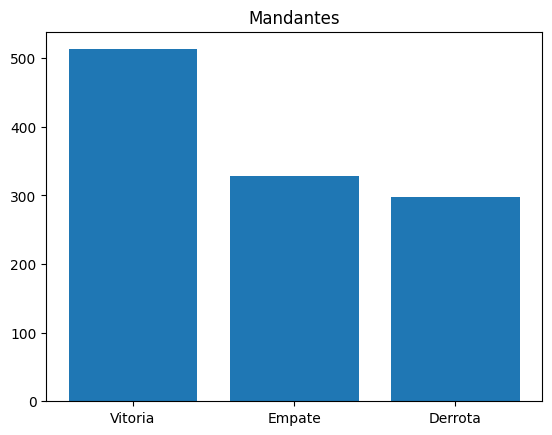

In [52]:
x = np.arange(3)
plt.title("Resultados dos Mandantes")
plt.bar(x, val_m)
plt.xticks(x, ('Vitoria', 'Empate', 'Derrota'))
plt.show()

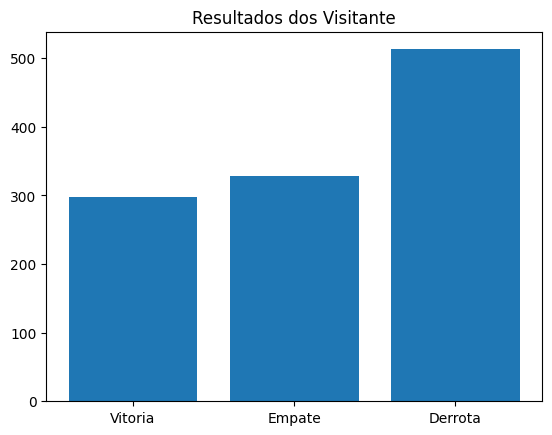

In [88]:
x = np.arange(3)
plt.title("Resultados dos Visitante")
plt.bar(x, val_v)
plt.xticks(x, ('Vitoria', 'Empate', 'Derrota'))
plt.show()

In [87]:
print("Media de Passes de um Time Mandante Vitorioso : " , manda[manda.resultado==1].passes.mean())
print("Média de Passes  de um Time Mandante Derrotado: " , manda[manda.resultado==2].passes.mean())
print("Média de Passes  de um Time Mandante EMPATE: " , manda[manda.resultado==3].passes.mean())
print()
print("#################")
print()
print("Media de Passes  de um Time Visitante Vitorioso: ",visit[visit.resultado==1].passes.mean())
print("Média de Passes  de um Time Visitante Derrotado: " , visit[visit.resultado==2].passes.mean())
print("Média de Passes  de um Time Visitante EMPATE: " , visit[visit.resultado==3].passes.mean())

Media de Passes de um Time Mandante Vitorioso :  425.09161793372317
Média de passes de um Time Mandante Derrotado:  444.9429530201342
Média de passes de um Time Mandante EMPATE:  432.21276595744683

#################

Media de Passes de um Time Visitante Vitorioso:  402.09060402684565
Média de passes de um Time Visitante Derrotado:  424.73879142300194
Média de passes de um Time Visitante EMPATE:  406.4559270516717


In [92]:
print("Media de chutes de um Time Mandante Vitorioso : " , manda[manda.resultado==1].chutes.mean())
print("Média de chutes de um Time Mandante Derrotado: " , manda[manda.resultado==2].chutes.mean())
print("Média de chutes de um Time Mandante EMPATE: " , manda[manda.resultado==3].chutes.mean())
print()
print("#################")
print()
print("Media de chutes de um Time Visitante Vitorioso: ",visit[visit.resultado==1].chutes.mean())
print("Média de chutes de um Time Visitante Derrotado: " , visit[visit.resultado==2].chutes.mean())
print("Média de chutes de um Time Visitante EMPATE: " , visit[visit.resultado==3].chutes.mean())

Media de chutes de um Time Mandante Vitorioso :  14.810916179337232
Média de chutes de um Time Mandante Derrotado:  14.144295302013424
Média de chutes de um Time Mandante EMPATE:  14.142857142857142

#################

Media de chutes de um Time Visitante Vitorioso:  12.080536912751677
Média de chutes de um Time Visitante Derrotado:  11.070175438596491
Média de chutes de um Time Visitante EMPATE:  11.592705167173252


In [ ]:
manda